# Loading dataset

In [1]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [2]:
#description of the dataset

print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
print(california.data.shape)
print(california.target.shape)

(20640, 8)
(20640,)


In [4]:
#load the feature names
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
import pandas as pd

#pd.set_option('precision', 4)
#pd.set_option('max_columns', 9)
#pd.set_option('display.width', None)
california_df = pd.DataFrame(california.data,
                             columns=california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Visualizing the features

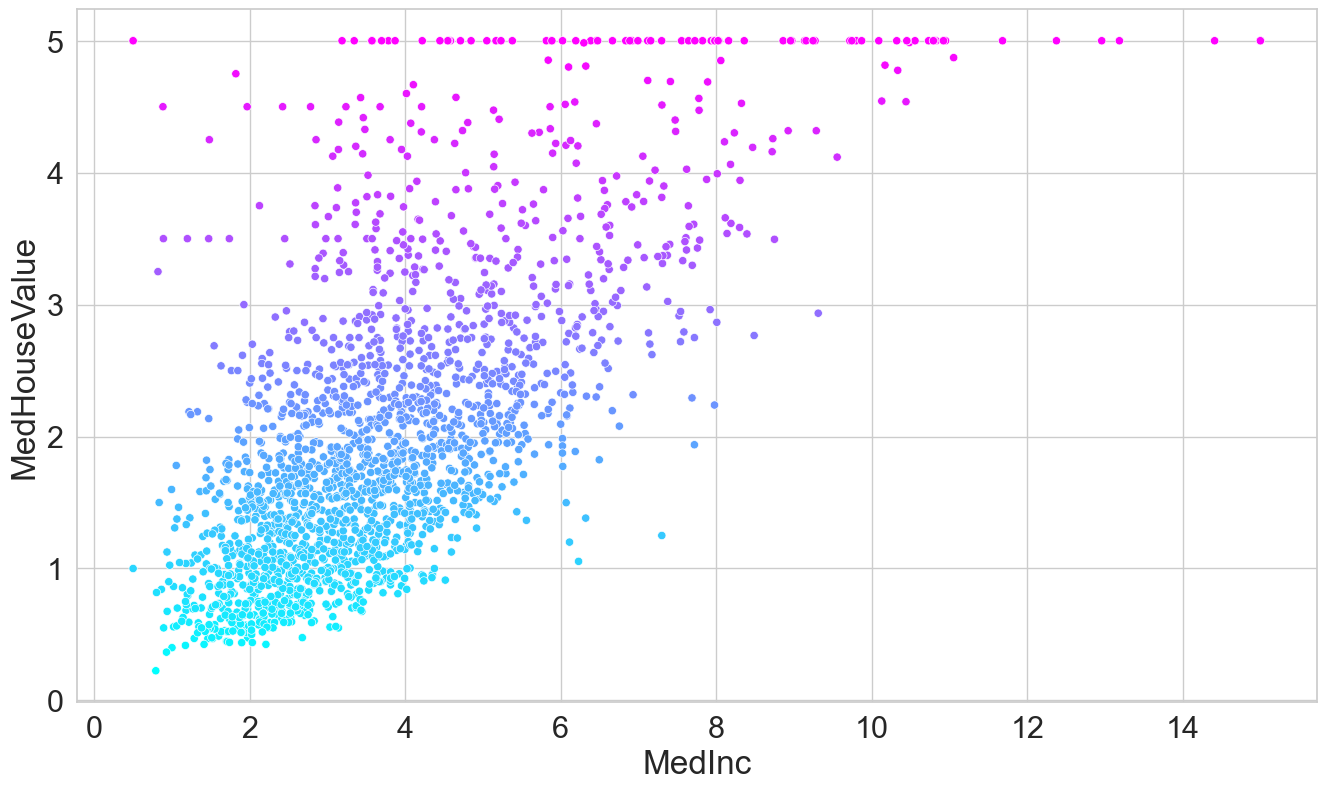

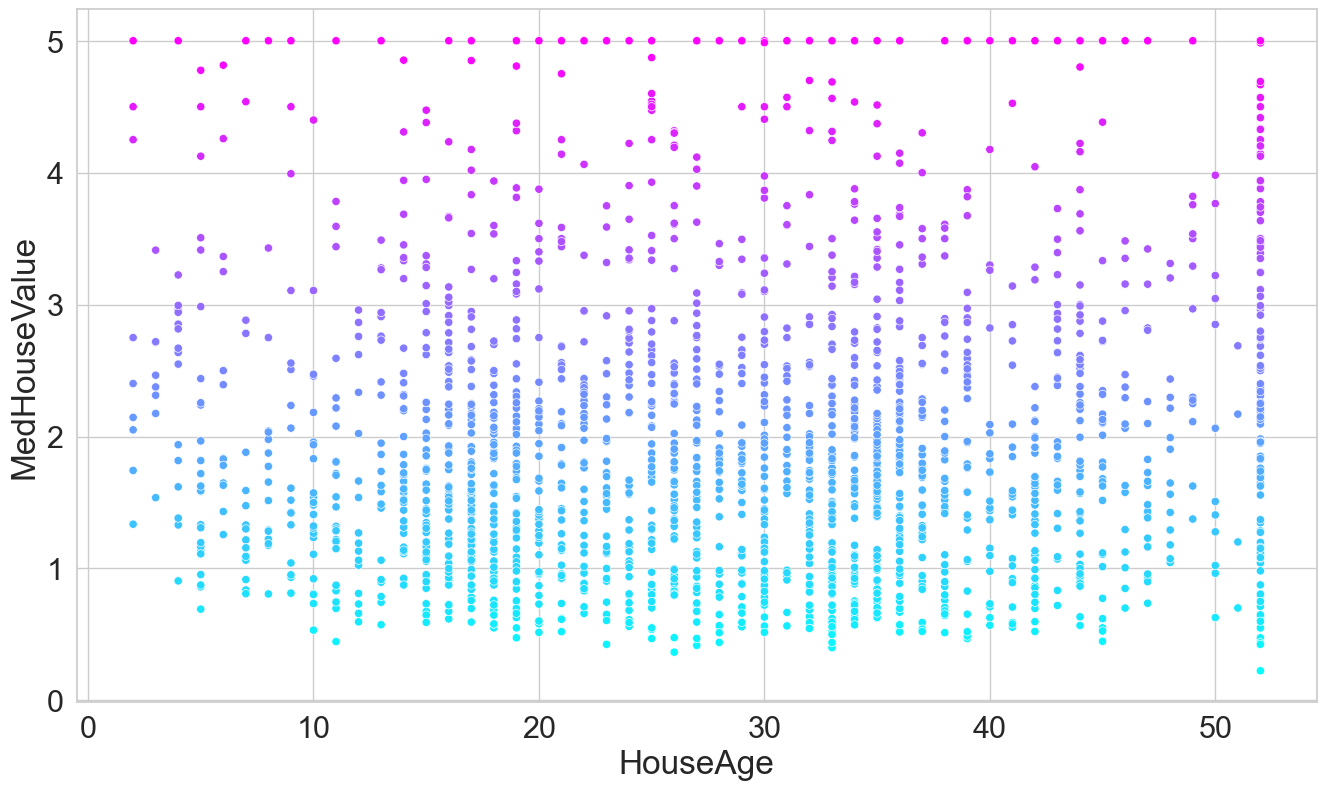

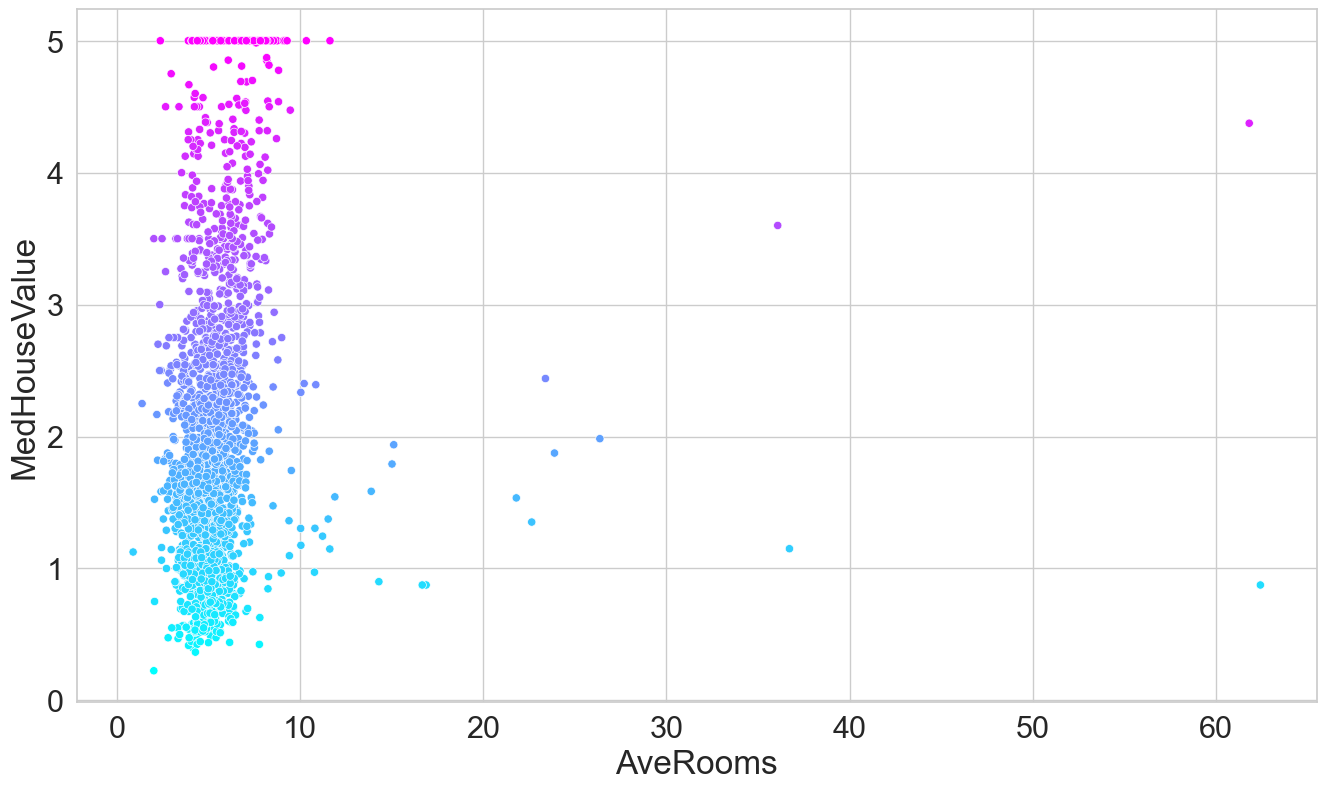

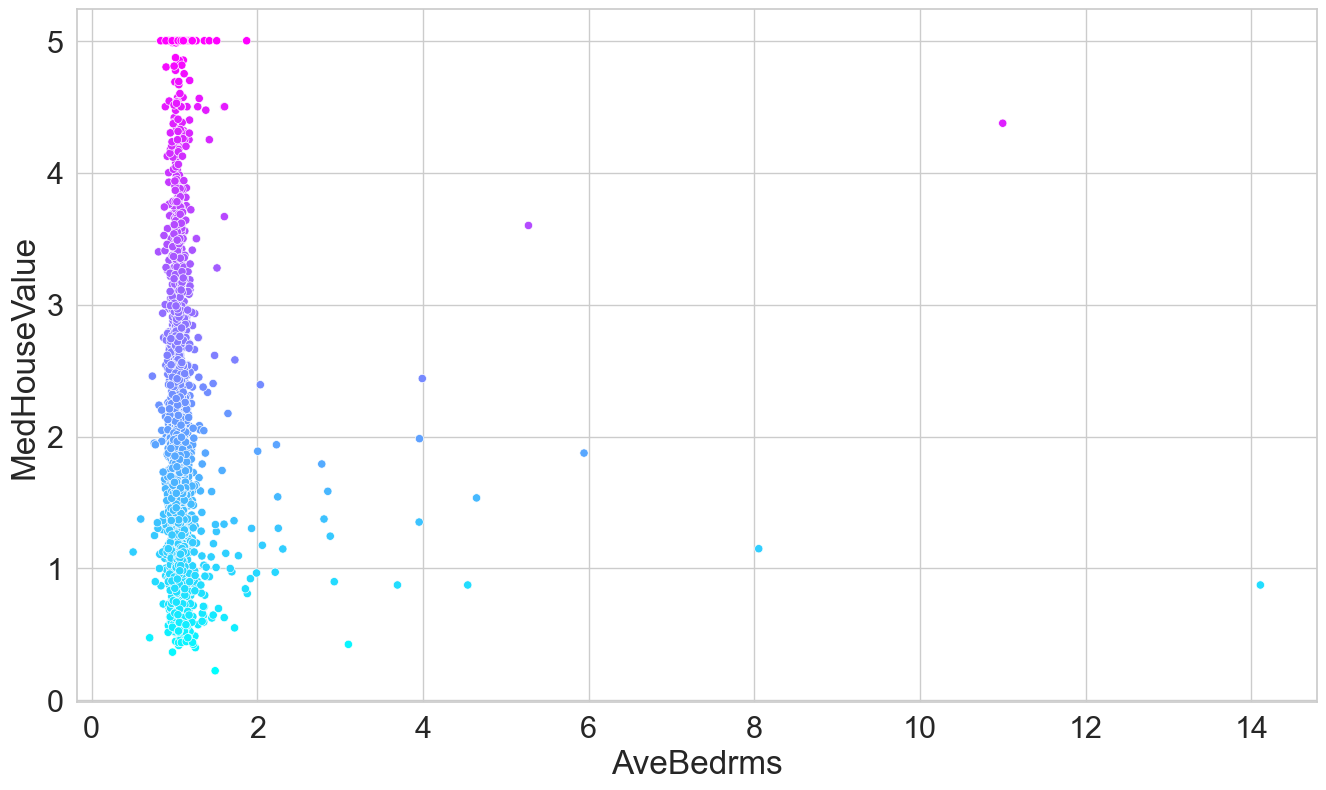

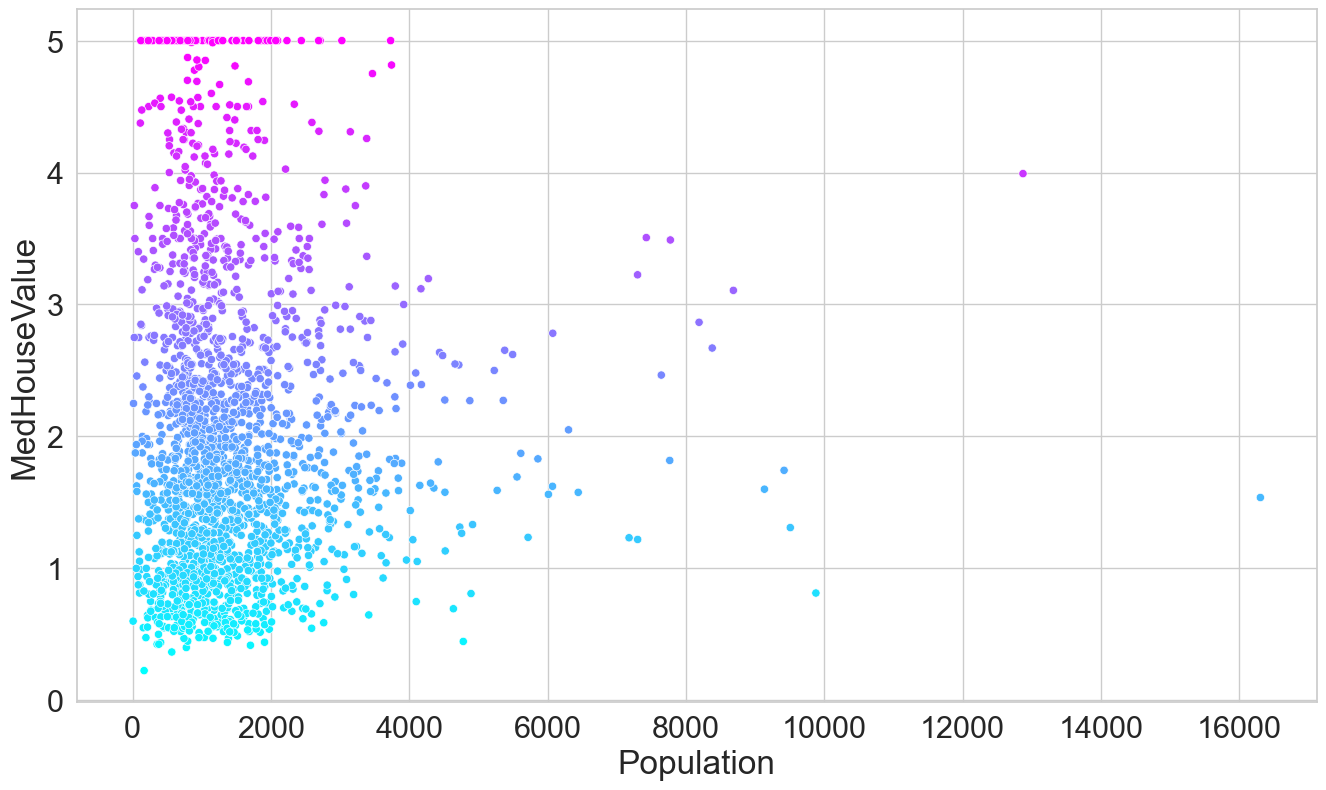

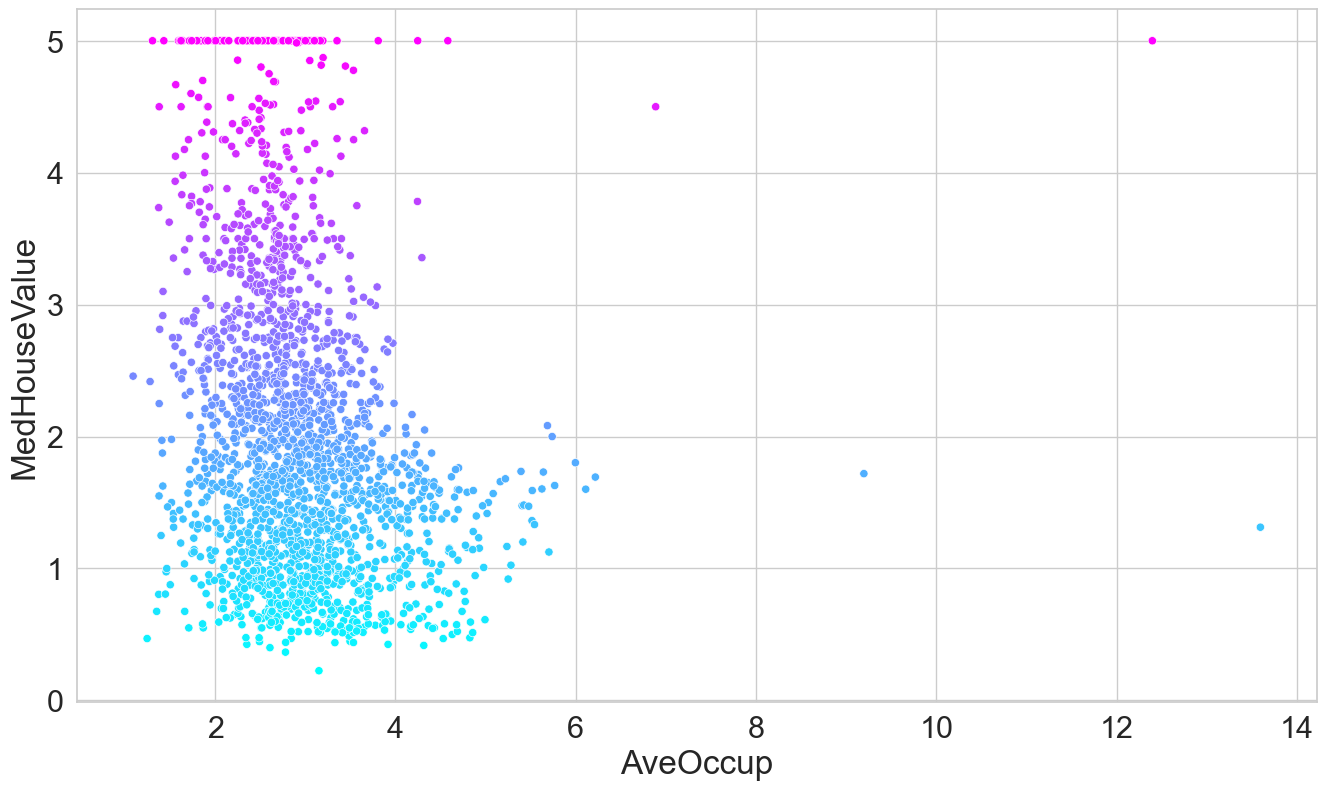

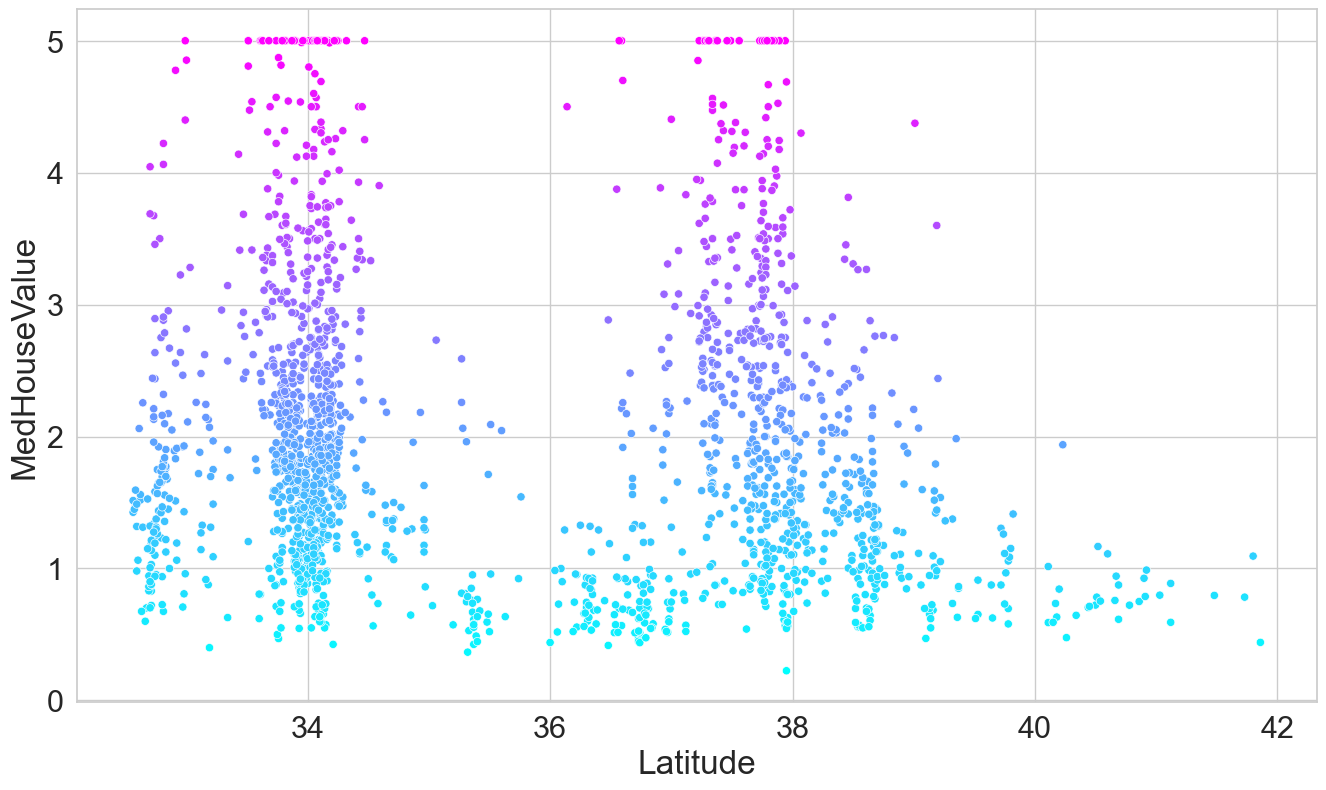

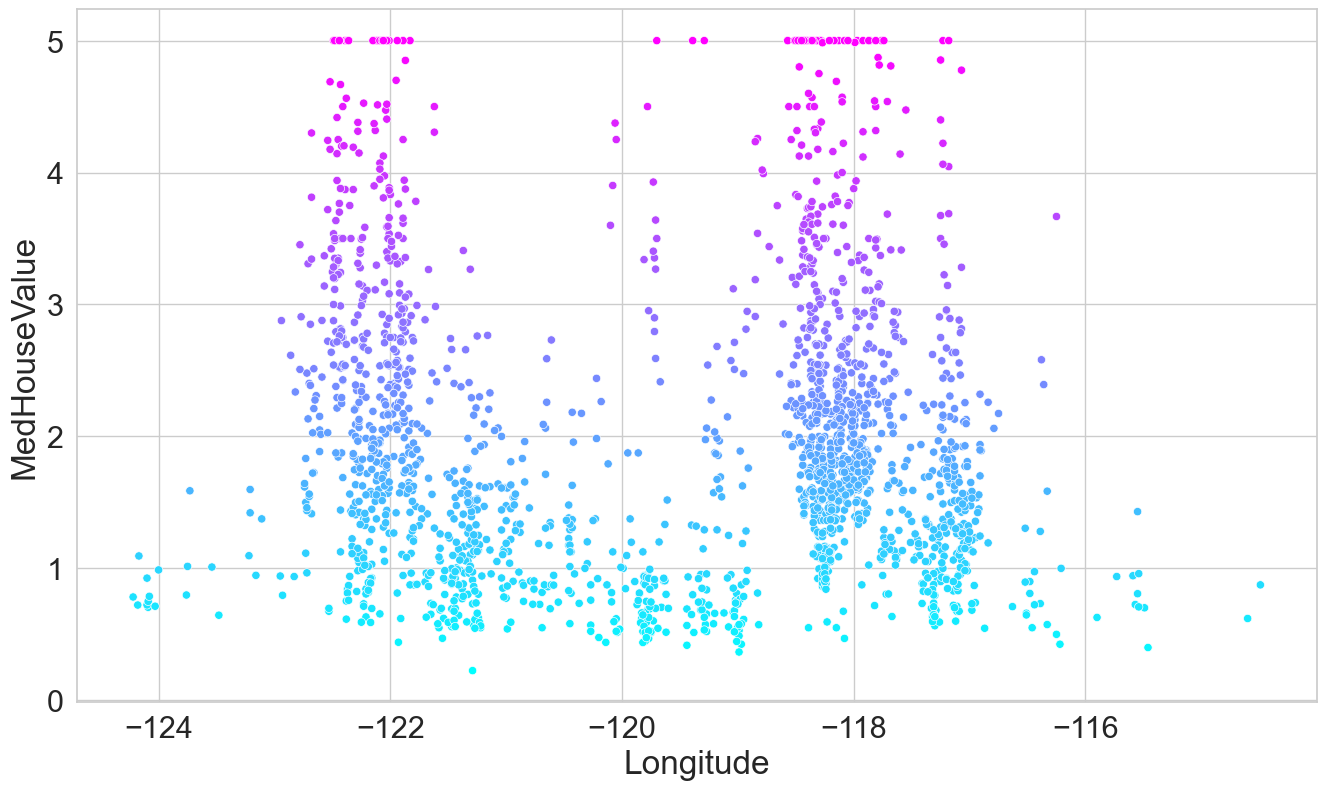

In [ ]:
#using matplotlib for visualization

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

sample_df = california_df.sample(frac=0.1, random_state=17)

for feature in california.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature,y='MedHouseValue',
                    hue='MedHouseValue', palette='cool', legend=False)

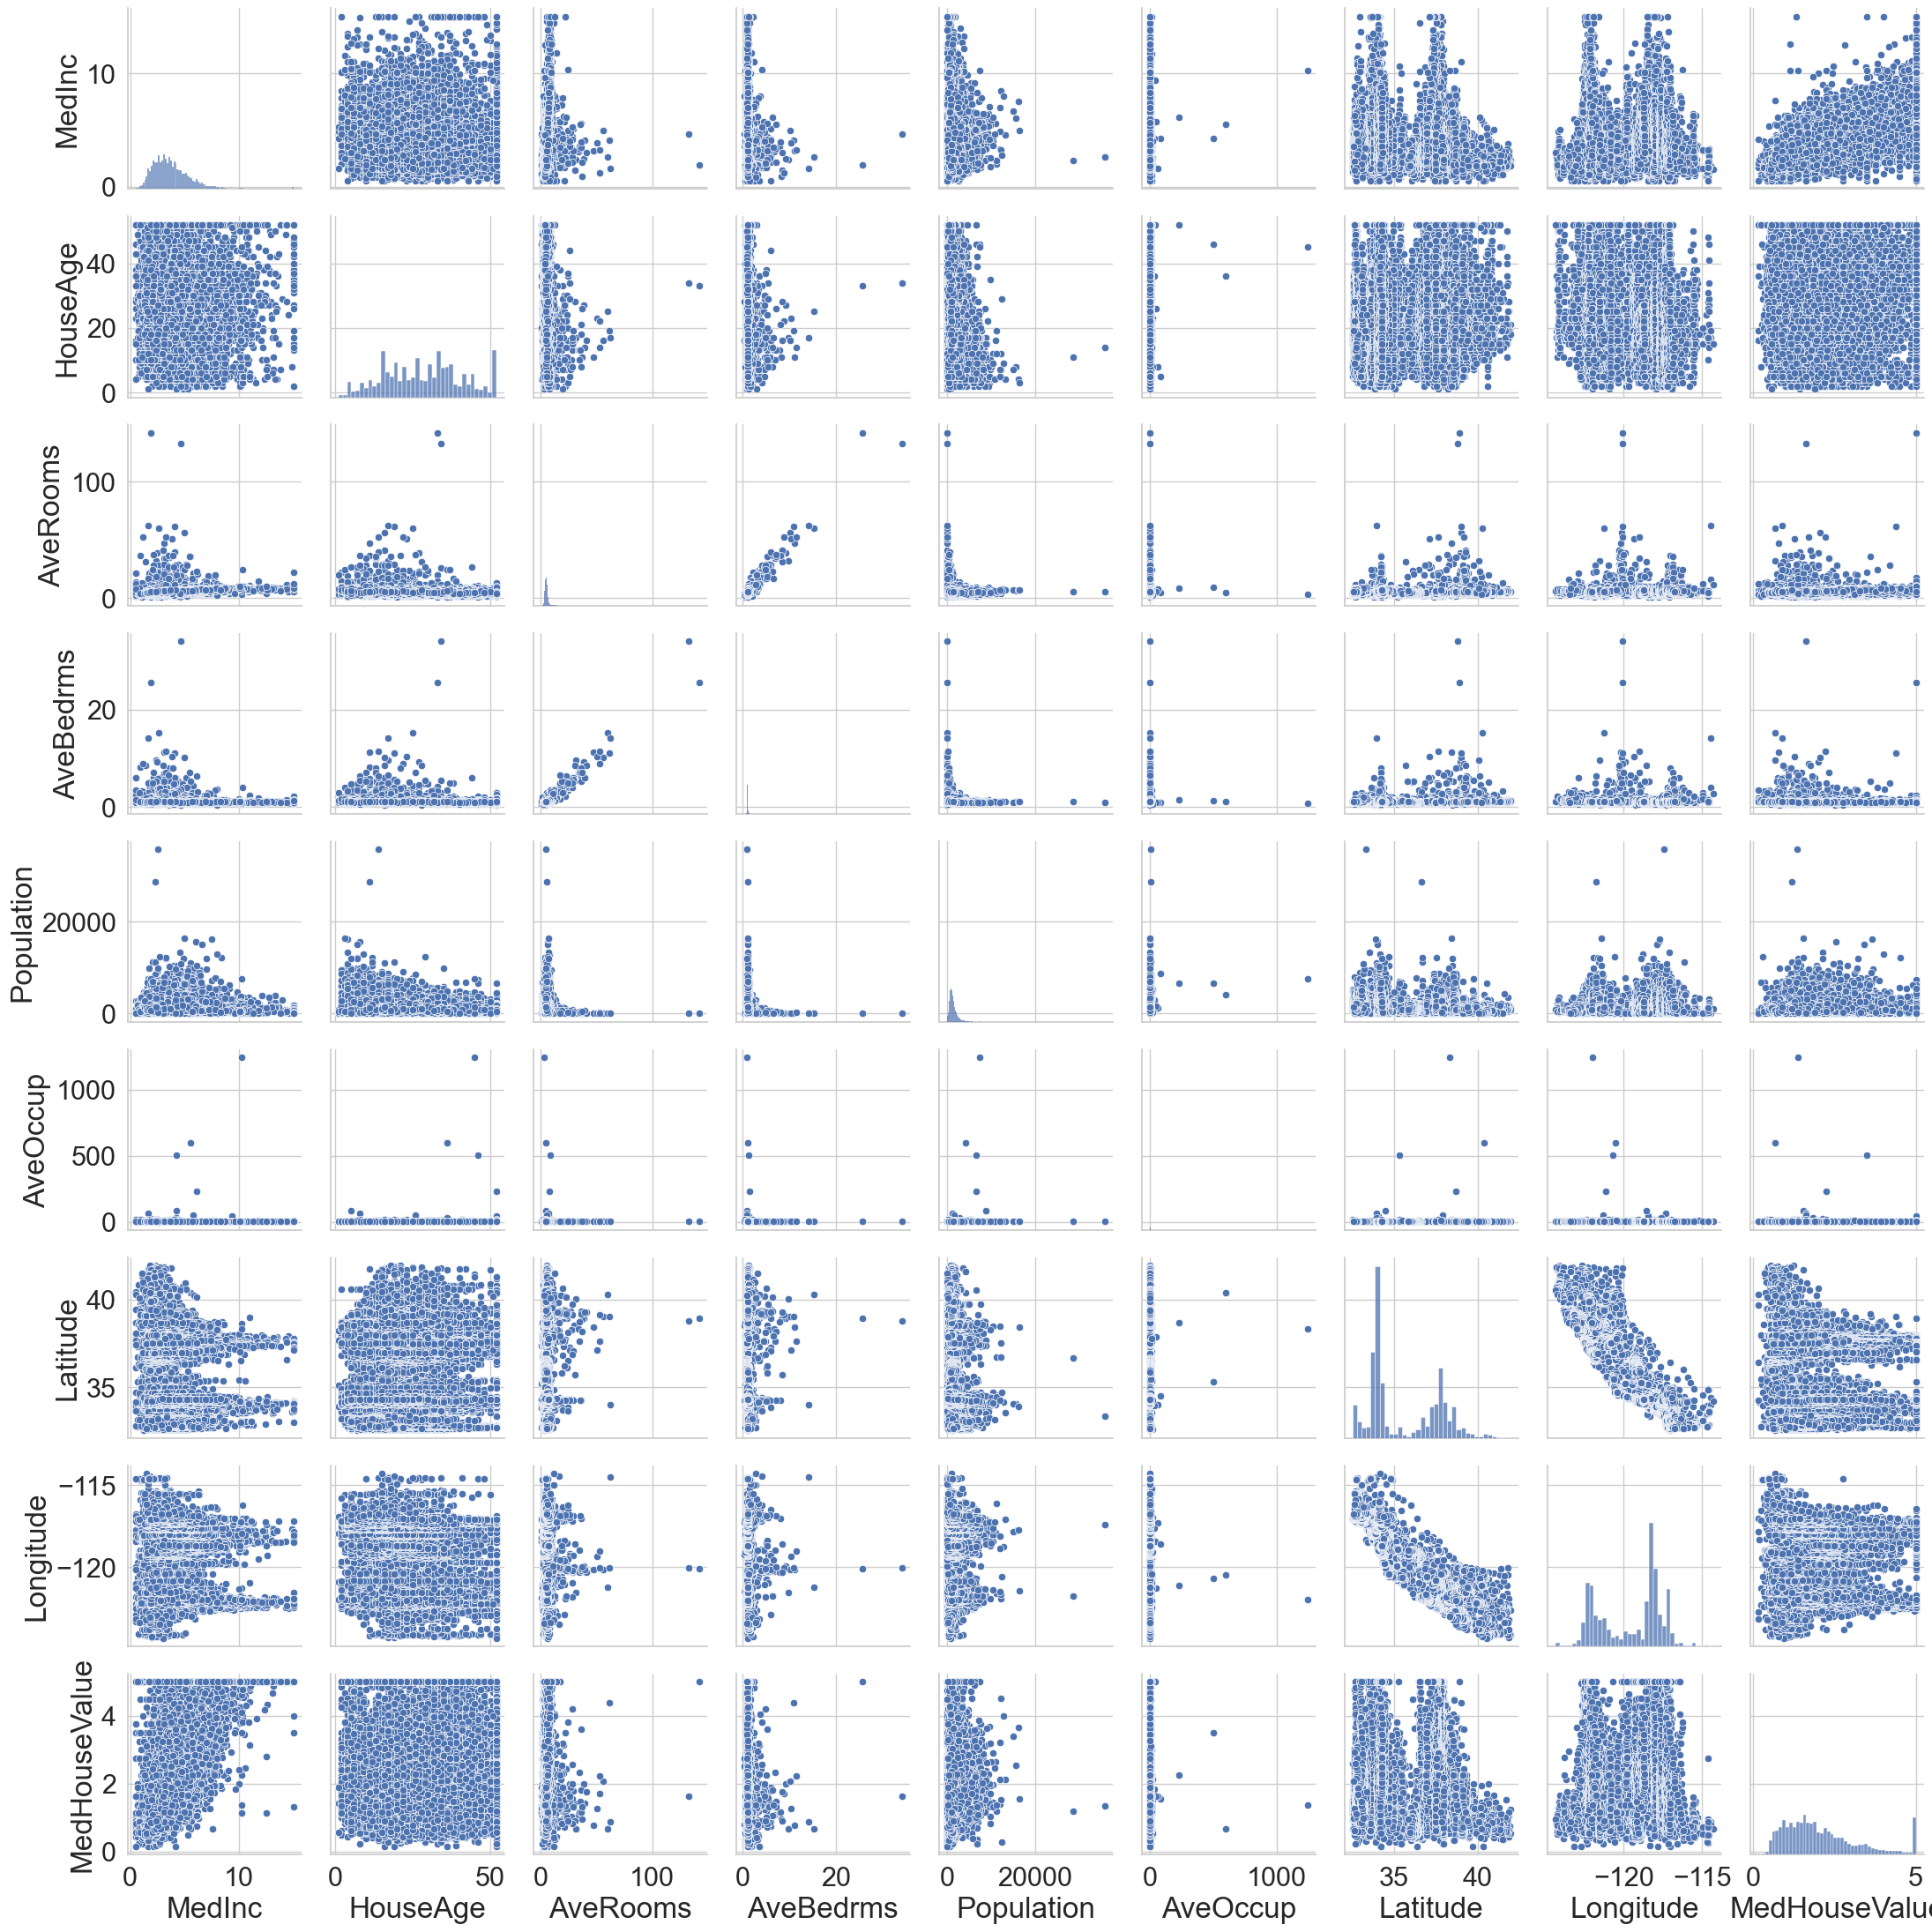

In [68]:
sns.pairplot(california_df)

# Applying KAN

In [39]:
import os
import sys
import numpy as np

currentdir = os.path.abspath("")
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

from KAN_sourse import KANRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [40]:
print(f'{min(california.target)=}\n{max(california.target)=}\n{np.mean(california.target)=}\n{np.median(california.target)=}\n{np.std(california.target)=}')

min(california.target)=0.14999
max(california.target)=5.00001
np.mean(california.target)=2.068558169089147
np.median(california.target)=1.797
np.std(california.target)=1.1539282040412253


In [53]:
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(california.target.reshape([-1,1])).ravel()
print(f'{min(y_scaled)=}\n{max(y_scaled)=}\n{np.mean(y_scaled)=}\n{np.median(y_scaled)=}\n{np.std(y_scaled)=}')
y_scaled

min(y_scaled)=-1.6626408492053844
max(y_scaled)=2.540410937738136
np.mean(y_scaled)=2.0379907924902098e-16
np.median(y_scaled)=-0.23533367859292345
np.std(y_scaled)=1.0


array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803])

In [45]:
kan = KANRegressor(hidden_layer_sizes=[3,1], grid=3, n_iter_no_change=5)

pipe = Pipeline([
        ('scale', StandardScaler()),
        ('kan', kan)
        ])
pipe.fit(X=california.data, y=y_scaled)

c:\Users\Gavriil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                                                        | 0/100 [00:00<?, ?it/s]

trn_ls: 5.03e-01 | vl_ls: 5.24e-01 | e_stop: 5/5 | tst_ls: 4.28e-01 | reg: 2.29e+01 :  43%|██▌   | 43/100 [09:12<12:12, 12.85s/it]


Early stopping criteria raised


Pipeline(steps=[('scale', StandardScaler()),
                ('kan',
                 KANRegressor(hidden_layer_sizes=[3, 1], n_iter_no_change=5))])

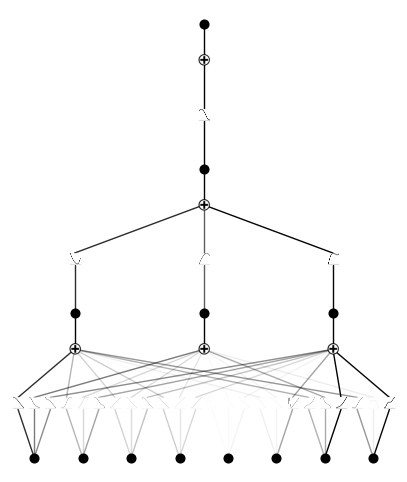

In [46]:
kan.kan.plot()

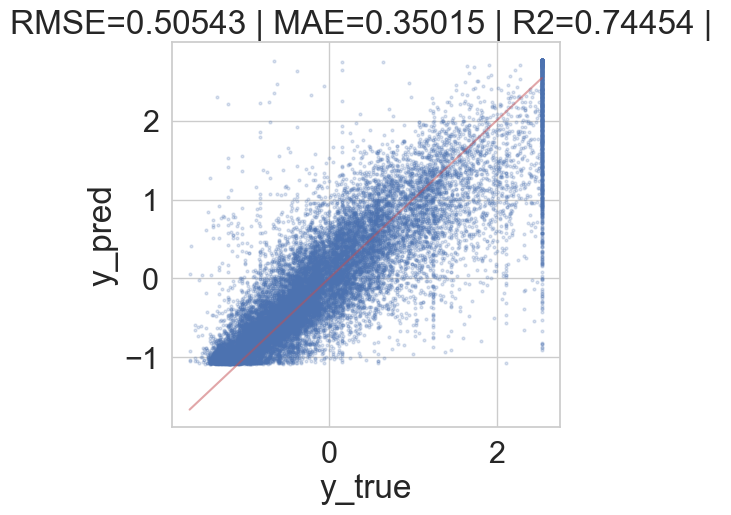

(0.5054256818103097, 0.35015208573775014, 0.7445448801665837)

In [48]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2_score


def rmse(y_true, y_pred, kwargs={}):
    return (mse(y_true, y_pred, **kwargs))**0.5


def scatter_prediction(model, 
                       x, 
                       y_true, 
                       y_scaler=1,
                       title = ""):
    """Evaluates MSE and R^2 of model. 
    Draws scatter plot of (y_true, y_predicted).
    Returns  (mse, r2)
    """
    y_pred = model.predict(x)
    
    if y_scaler!=1:
        y_pred = y_scaler.inverse_transform(y_pred.reshape(1, -1)).ravel()
        y_true = y_scaler.inverse_transform(y_true.reshape(1, -1)).ravel()
    
    model_rmse = rmse(y_true, y_pred)
    model_mae = mae(y_true, y_pred)
    model_r2 = r2_score(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(5,5))
    plt.plot(y_true, y_pred, 'o', markersize=2, alpha = 0.2) 
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], markersize=2, alpha = 0.5, color='r') 
    ax.set_title(f"RMSE={round(model_rmse, 5)} | MAE={round(model_mae, 5)} | R2={round(model_r2, 5)} | {title}")
    ax.set_xlabel("y_true")
    ax.set_ylabel("y_pred")
    plt.show()
    
    return model_rmse, model_mae, model_r2


scatter_prediction(pipe, california.data, y_scaled)

In [54]:
#choosing the best model
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


estimators = {
    'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'MLP': MLPRegressor(hidden_layer_sizes=[16,]), # 168 params = in_size*(hid_neuron+1) + hid_neuron*(out_size+1) = 8*17+16*2
    'KAN': KANRegressor(hidden_layer_sizes=[3,])} # 162 params = (in_size*hid_neuron + hid_neuron*out_size) * (grid + k - 1 - base_f(=1)) = (8*3+3*1)*(3+3)

scoring = {'rmse': make_scorer(root_mean_squared_error), 
           'mae': make_scorer(mean_absolute_error),
           'r2': make_scorer(r2_score)}

dict_scores = {}

from sklearn.model_selection import KFold, cross_validate

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    
    pipeline = Pipeline([
        ('scale', StandardScaler()),
        ('estimator', estimator_object)
    ])
    scores = cross_validate(estimator=pipeline,
                             X=california.data, y=y_scaled, cv=kfold,
                             scoring=scoring)

    dict_scores[estimator_name] = scores

c:\Users\Gavriil\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gavriil\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gavriil\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


checkpoint directory created: ./model
saving model version 0.0


trn_ls: 4.91e-01 | vl_ls: 4.97e-01 | e_stop: 10/10 | tst_ls: 5.12e-01 | reg: 2.62e+01 :  25%|█   | 25/100 [03:48<11:25,  9.14s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0


trn_ls: 4.79e-01 | vl_ls: 4.69e-01 | e_stop: 10/10 | tst_ls: 5.39e-01 | reg: 3.40e+01 :  39%|█▌  | 39/100 [05:18<08:17,  8.16s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0


trn_ls: 5.04e-01 | vl_ls: 5.23e-01 | e_stop: 10/10 | tst_ls: 5.75e-01 | reg: 3.17e+01 :  25%|█   | 25/100 [03:16<09:49,  7.86s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0


trn_ls: 4.71e-01 | vl_ls: 4.87e-01 | e_stop: 10/10 | tst_ls: 4.70e-01 | reg: 2.46e+01 :  38%|█▌  | 38/100 [04:55<08:02,  7.78s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0


trn_ls: 4.78e-01 | vl_ls: 4.80e-01 | e_stop: 10/10 | tst_ls: 4.80e-01 | reg: 2.88e+01 :  44%|█▊  | 44/100 [04:58<06:20,  6.79s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0


trn_ls: 4.83e-01 | vl_ls: 5.01e-01 | e_stop: 10/10 | tst_ls: 5.18e-01 | reg: 2.86e+01 :  27%|█   | 27/100 [04:38<12:32, 10.31s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0


trn_ls: 4.70e-01 | vl_ls: 4.88e-01 | e_stop: 10/10 | tst_ls: 4.32e-01 | reg: 3.64e+01 :  55%|██▏ | 55/100 [09:57<08:09, 10.87s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0


trn_ls: 4.72e-01 | vl_ls: 4.97e-01 | e_stop: 10/10 | tst_ls: 4.62e-01 | reg: 3.10e+01 :  34%|█▎  | 34/100 [06:19<12:16, 11.15s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0


trn_ls: 5.04e-01 | vl_ls: 5.05e-01 | e_stop: 10/10 | tst_ls: 4.53e-01 | reg: 4.80e+01 :  46%|█▊  | 46/100 [07:30<08:48,  9.79s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0


trn_ls: 4.76e-01 | vl_ls: 6.07e-01 | e_stop: 10/10 | tst_ls: 4.61e-01 | reg: 2.60e+01 :  25%|█   | 25/100 [03:05<09:15,  7.41s/it]


Early stopping criteria raised


In [59]:
def get_df_metr(dict_scores, metric_name = 'test_rmse'):
    dict_data = {}
    for model_name in dict_scores.keys():
        dict_data[model_name] = dict_scores[model_name][metric_name]

    return pd.DataFrame(dict_data)


df_rmse = get_df_metr(dict_scores, 'test_rmse')
df_mae = get_df_metr(dict_scores, 'test_mae')
df_r2 = get_df_metr(dict_scores, 'test_r2')

df_rmse

,LinearRegression,ElasticNet,Lasso,Ridge,MLP,KAN
0,0.617065,0.922064,1.003026,0.617068,0.462619,0.484173
1,0.644790,0.926742,1.008639,0.644785,0.514656,0.491173
2,0.642712,0.912704,0.990588,0.642722,0.495879,0.532402
3,0.664993,0.910574,0.993326,0.664992,0.550542,0.503404
4,0.631549,0.925745,1.008175,0.631552,0.487257,0.476392
5,0.624933,0.889813,0.976832,0.624882,0.463301,0.482295
6,0.627033,0.925474,1.005094,0.627039,0.486858,0.475604
7,0.619728,0.922768,1.003006,0.619741,0.491726,0.486549
8,0.603419,0.902903,0.985452,0.603414,0.458992,0.480195
9,0.647222,0.943615,1.025929,0.647228,0.517278,0.510490


Text(0.5, 1.0, 'RMSE')

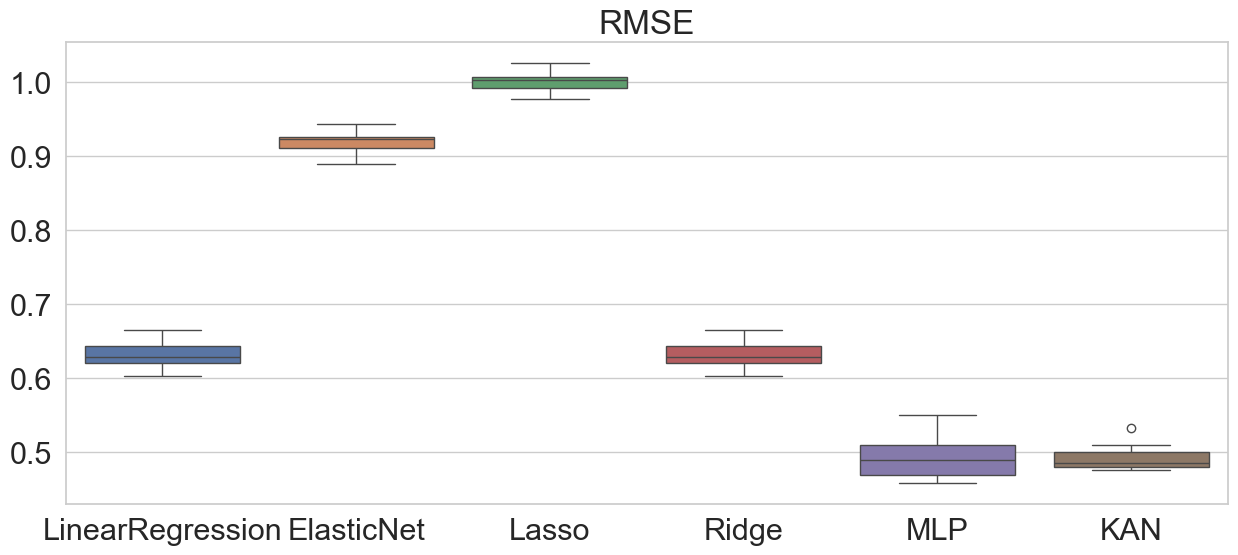

In [65]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(df_rmse, ax=ax)
plt.title('RMSE')

Text(0.5, 1.0, 'MAE')

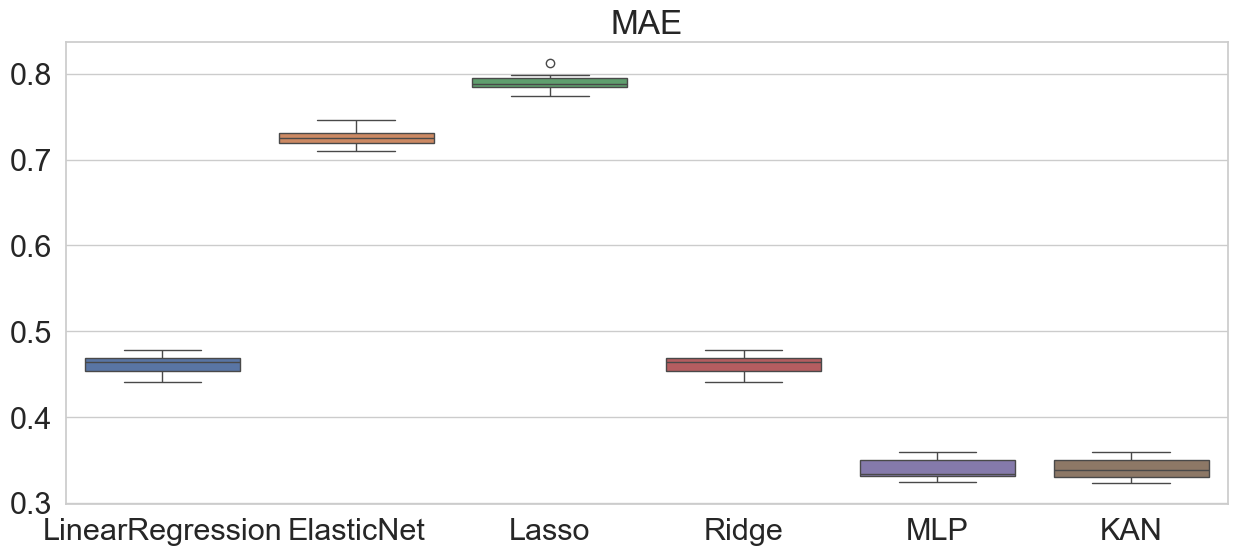

In [66]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(df_mae, ax=ax)
plt.title('MAE')

Text(0.5, 1.0, 'R2')

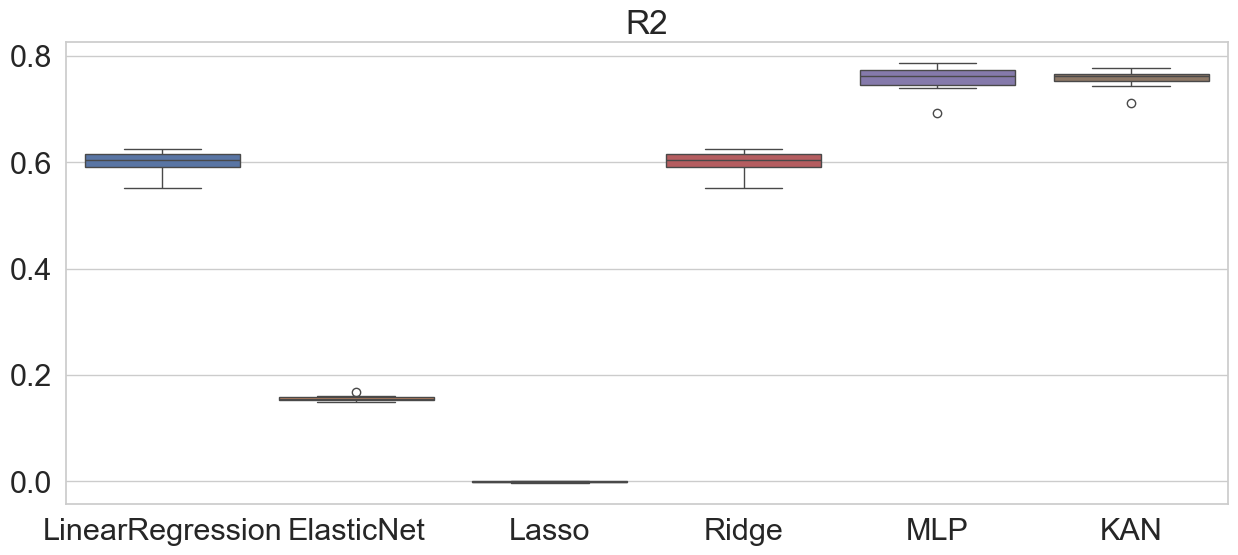

In [67]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(df_r2, ax=ax)
plt.title('R2')